**DEPUIS GOOGLE COLAB UNIQUEMENT**

In [ ]:
from google.colab import auth

In [ ]:
auth.authenticate_user()

In [ ]:
project_id = 'le-wagon-337814'
!gcloud config set project {project_id}
!gsutil ls

In [ ]:
! pip install --quiet git+https://github.com/christophelanson/icangetyoursmile

**---------------------------------------------------------------------------------------------------**

**EN LOCAL LANCER LES CELLULES A PARTIR D'ICI**

In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential
import random

In [6]:
from icangetyoursmile.trainer import run_full_model, upload_model_to_gcp

ImportError: cannot import name 'upload_model_to_gcp' from partially initialized module 'icangetyoursmile.trainer' (most likely due to a circular import) (/home/christophelanson/code/christophelanson/icangetyoursmile/icangetyoursmile/trainer.py)

Loading data from /home/christophelanson/code/christophelanson/icangetyoursmile/raw_data/128x128/...
Done
X shape : (80, 128, 128, 3)
y shape : (80, 128, 128, 3)
X_test shape : (20, 128, 128, 3)
y_test shape : (20, 128, 128, 3)
X_visu shape : (5, 128, 128, 3)
y_visu shape : (5, 128, 128, 3)


2022-03-07 18:57:08.619762: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-07 18:57:08.619797: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-07 18:57:08.619813: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (HP-CL): /proc/driver/nvidia/version does not exist
2022-03-07 18:57:08.620317: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
2/2 [==============================] - 12s 6s/step - loss: 28170.0078 - val_loss: 6462.9424
Epoch 2/10
2/2 [==============================] - 11s 6s/step - loss: 6713.3682 - val_loss: 4780.8101
Epoch 3/10
2/2 [==============================] - 10s 5s/step - loss: 4593.3203 - val_loss: 3297.8120
Epoch 4/10
2/2 [==============================] - 10s 5s/step - loss: 3919.1616 - val_loss: 2453.5298
Epoch 5/10
2/2 [==============================] - 10s 5s/step - loss: 3489.6284 - val_loss: 2097.4670
Epoch 6/10
2/2 [==============================] - 10s 5s/step - loss: 3158.3960 - val_loss: 1923.0961
Epoch 7/10
2/2 [==============================] - 10s 5s/step - loss: 2933.4092 - val_loss: 1788.5281
Epoch 8/10
2/2 [==============================] - 10s 6s/step - loss: 2689.7964 - val_loss: 1674.8225
Epoch 9/10
2/2 [==============================] - 11s 6s/step - loss: 2638.5356 - val_loss: 1561.7650
Epoch 10/10
2/2 [==============================] - 10s 5s/step - loss: 2571.1492 

2022-03-07 18:58:54.631774: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./saved_models/U-net-christophe/assets
1/1 [==============================] - 0s 491ms/step - loss: 1675.9456
uploading image_log to gcp
uploading model to gcp
uploading : ./saved_models/U-net-christophe/keras_metadata.pb
uploading : ./saved_models/U-net-christophe/saved_model.pb
uploading : ./saved_models/U-net-christophe/variables/variables.index
uploading : ./saved_models/U-net-christophe/variables/variables.data-00000-of-00001
upload finished

all done


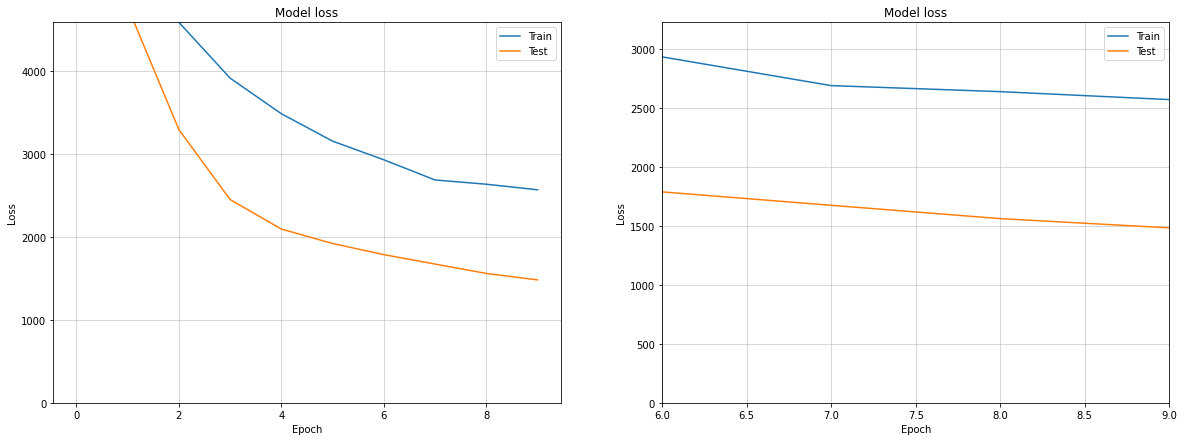

In [4]:
model_name = 'U-net-colab-test'
run_locally = True
path_to_data = None # for notebook use None, else gcp path to data
run_full_model(model_name, run_locally=run_locally, unet_power=2, sample_size=100,
               epochs=35, image_size=(128,128), random_seed=2,
               test_split=0.2, batch_size=32, validation_split=0.2)
upload_model_to_gcp(model_name, run_locally=run_locally)

In [31]:
import pickle

In [32]:
with open('./image_logs/U-net-christophe_img_log.pickle', 'rb') as handle:
    image_log = pickle.load(handle)

/tmp/ipykernel_2147/2587638806.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


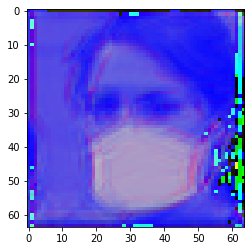

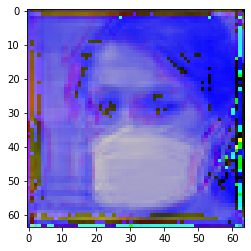

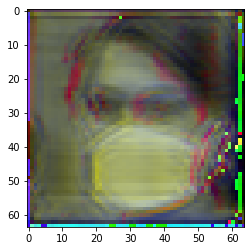

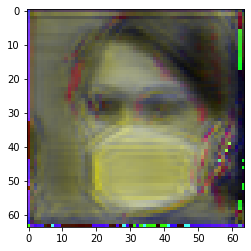

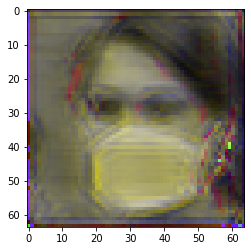

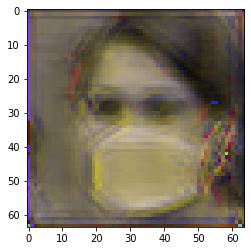

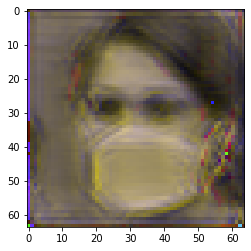

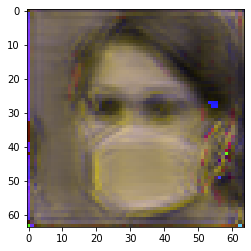

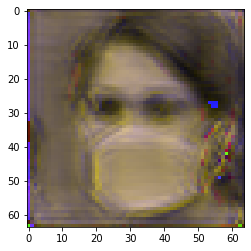

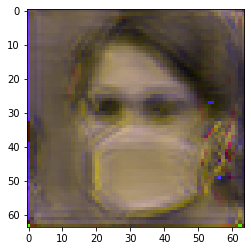

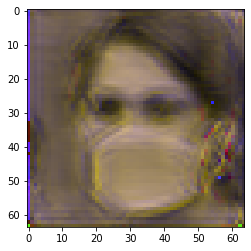

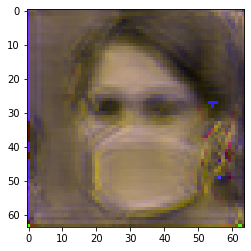

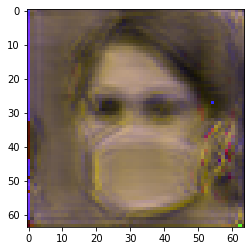

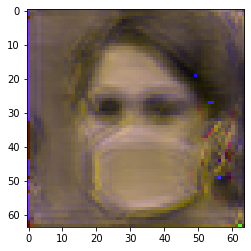

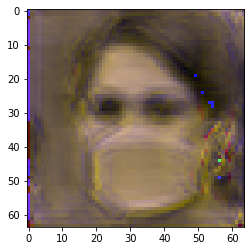

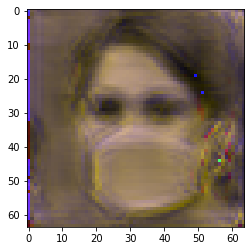

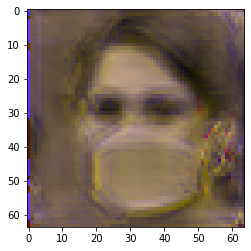

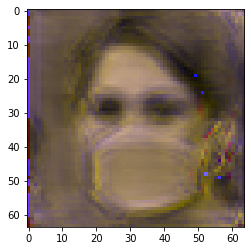

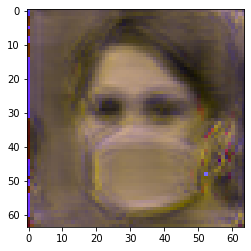

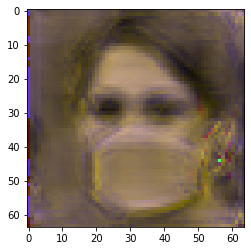

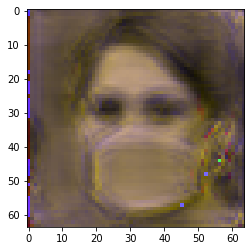

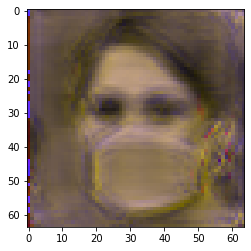

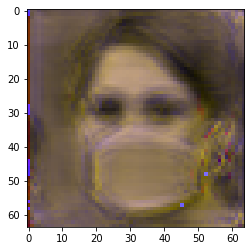

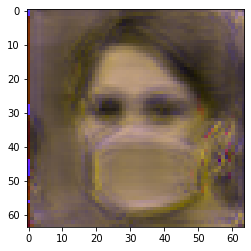

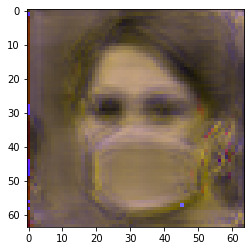

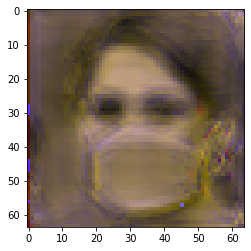

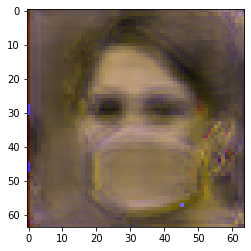

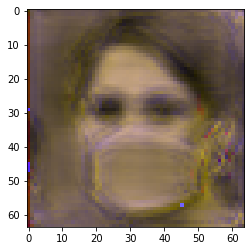

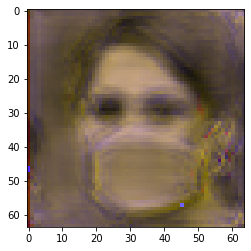

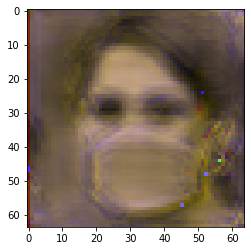

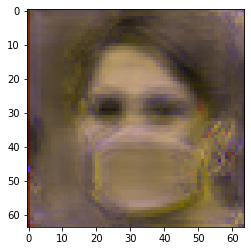

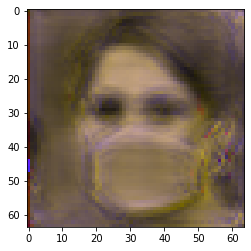

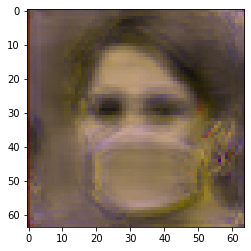

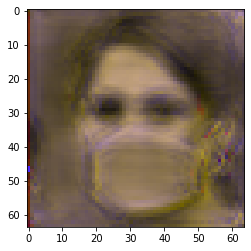

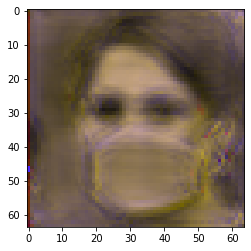

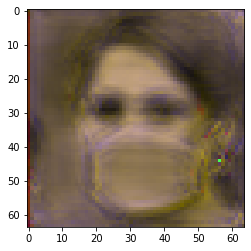

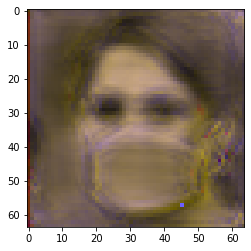

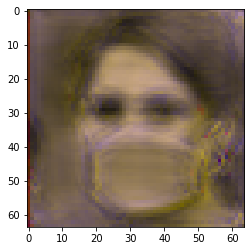

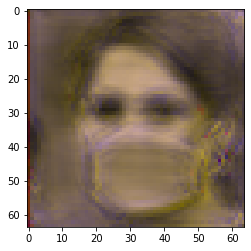

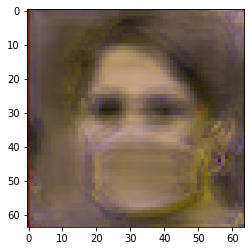

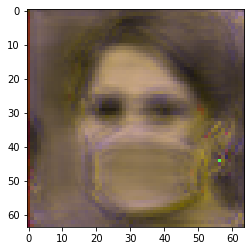

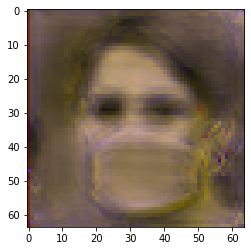

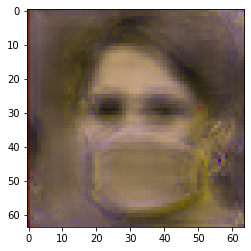

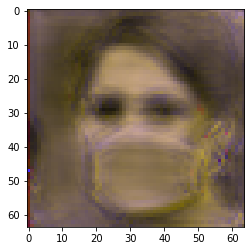

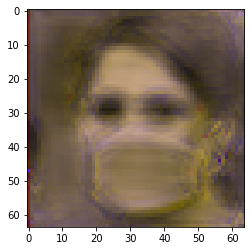

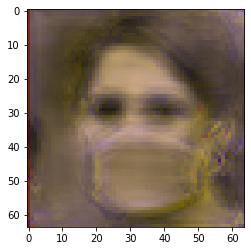

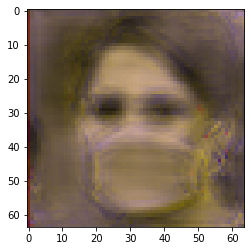

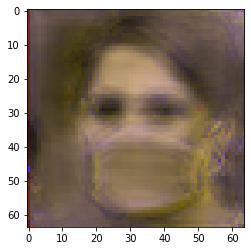

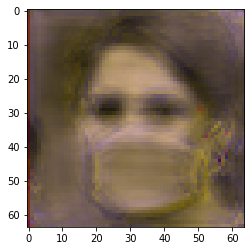

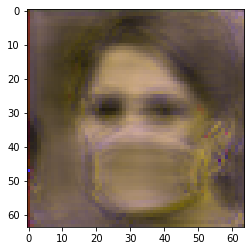

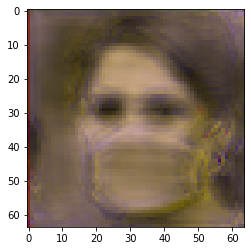

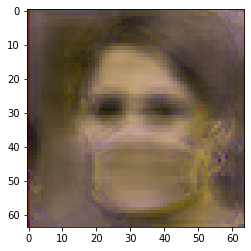

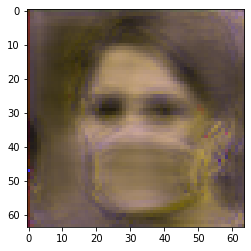

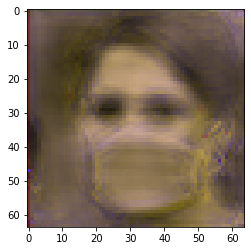

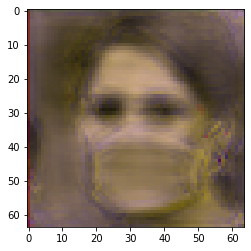

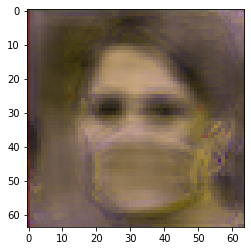

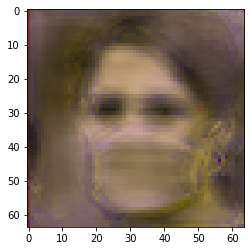

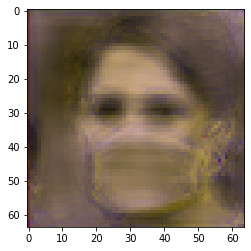

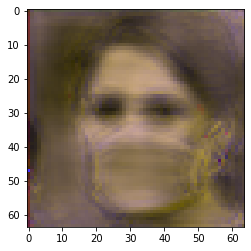

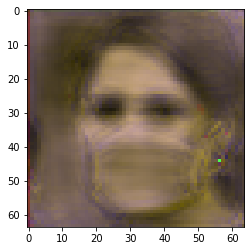

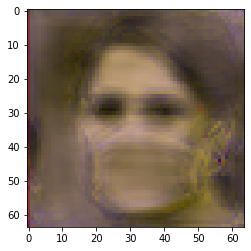

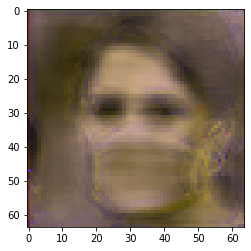

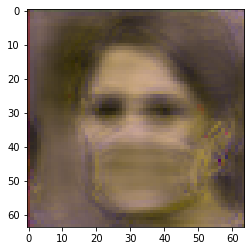

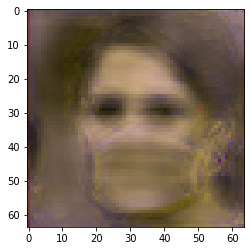

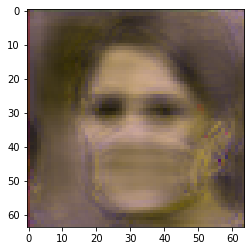

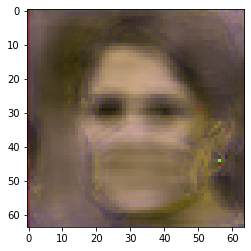

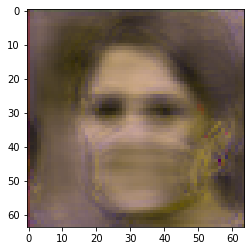

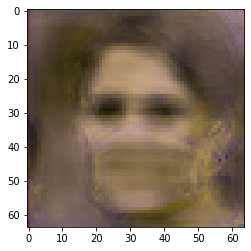

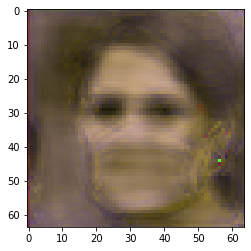

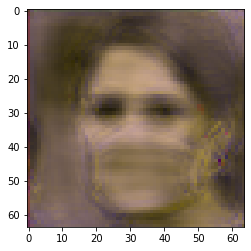

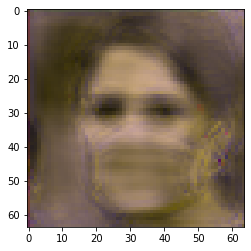

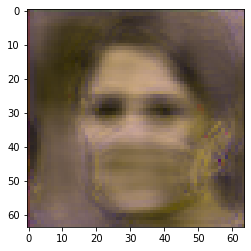

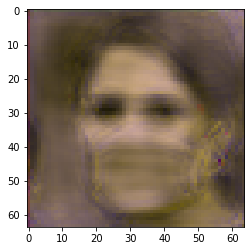

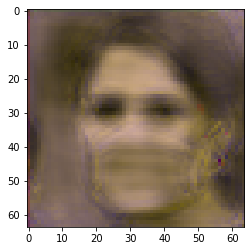

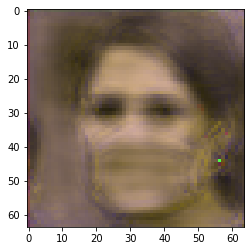

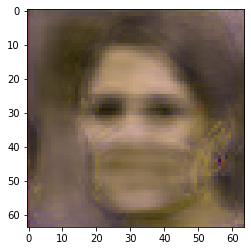

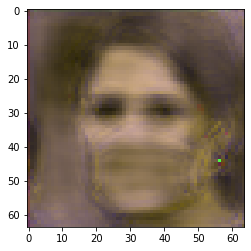

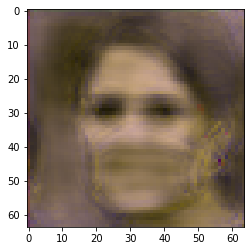

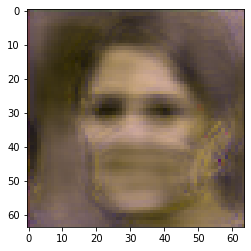

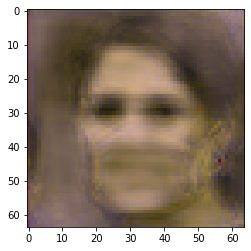

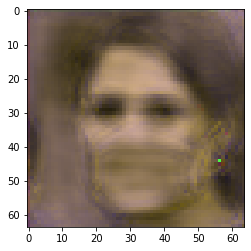

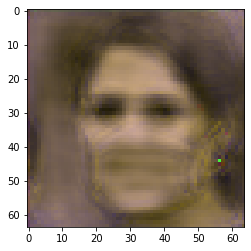

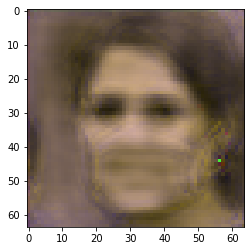

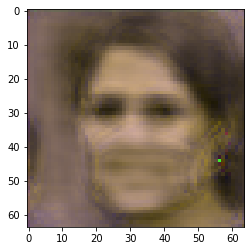

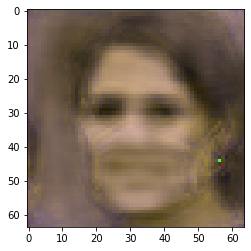

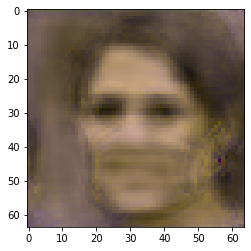

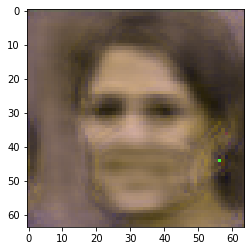

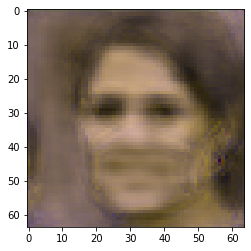

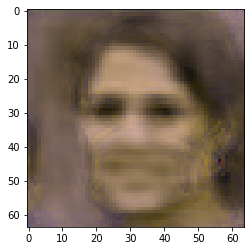

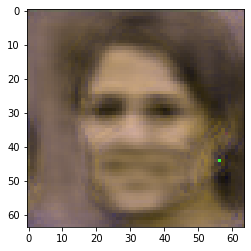

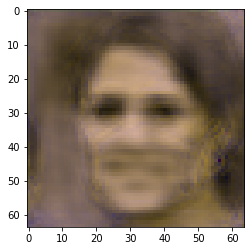

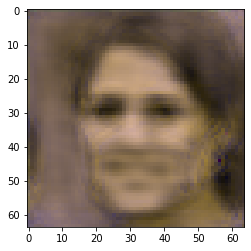

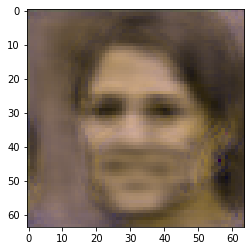

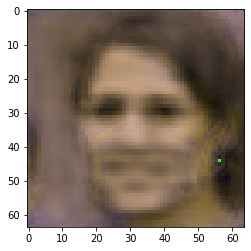

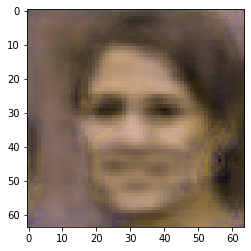

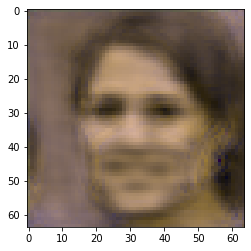

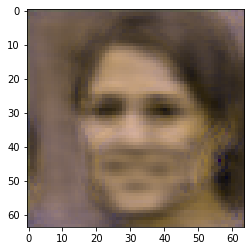

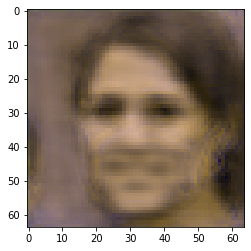

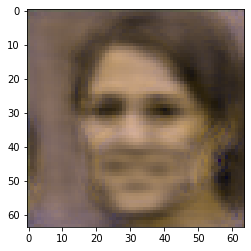

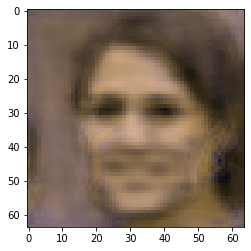

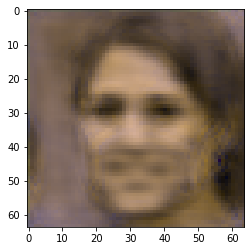

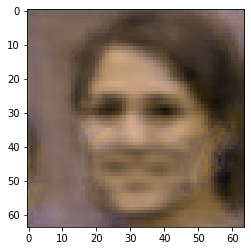

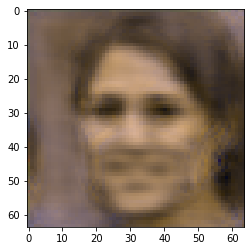

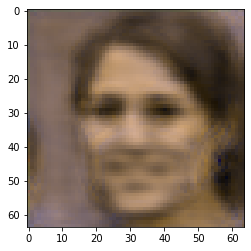

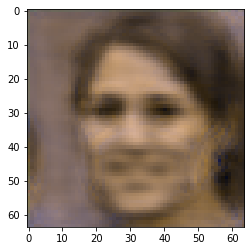

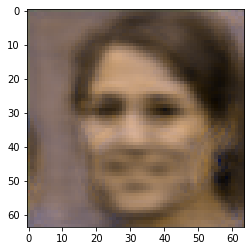

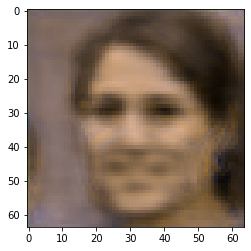

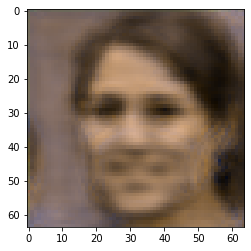

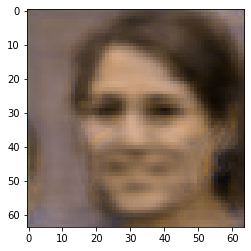

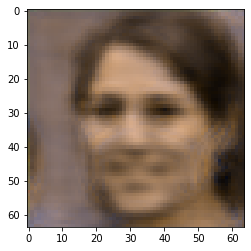

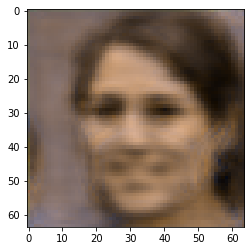

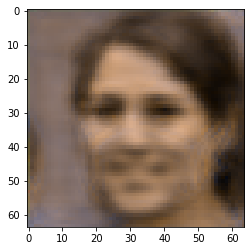

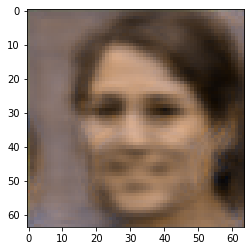

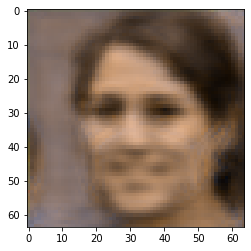

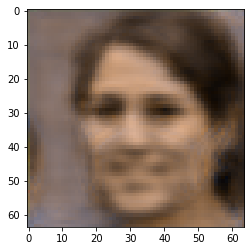

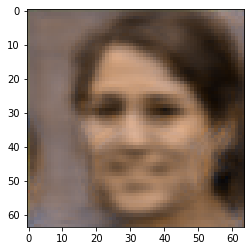

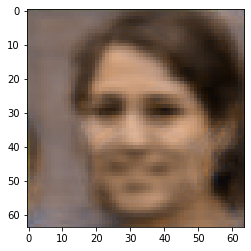

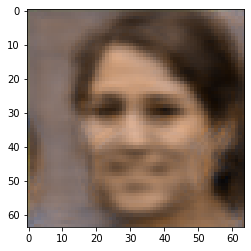

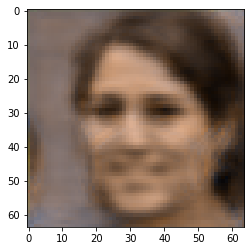

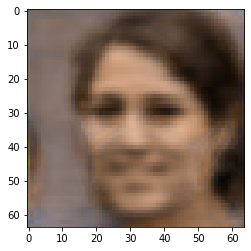

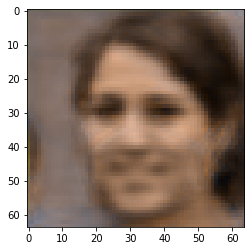

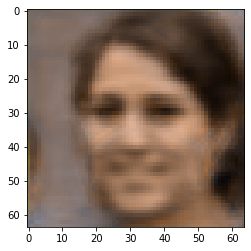

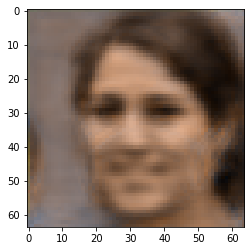

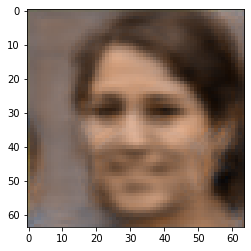

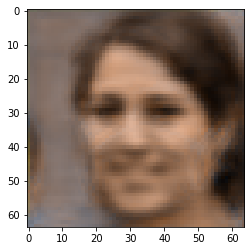

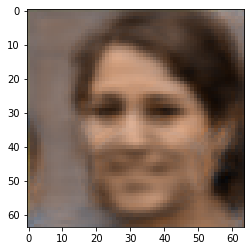

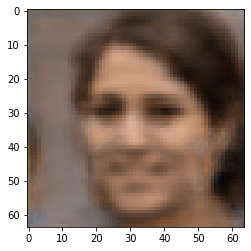

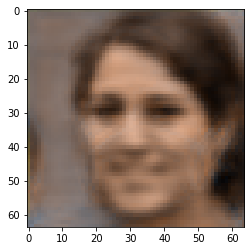

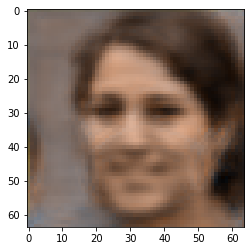

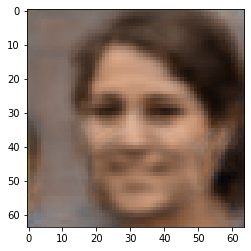

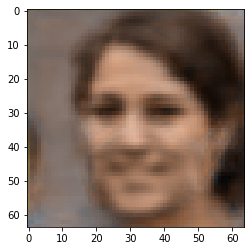

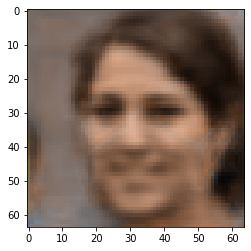

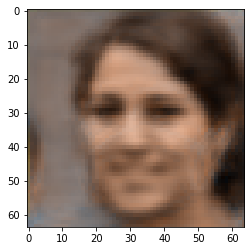

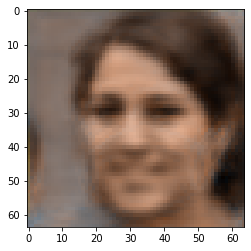

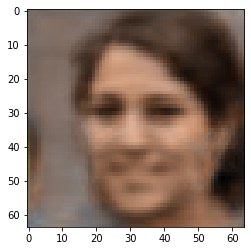

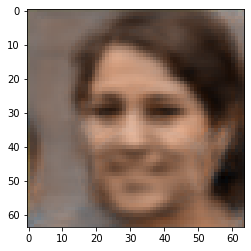

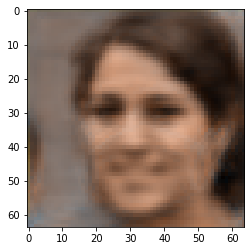

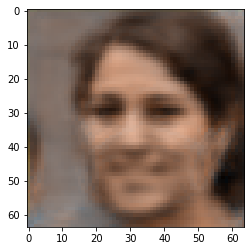

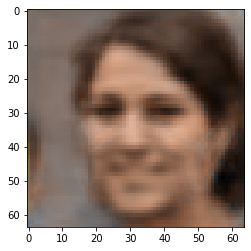

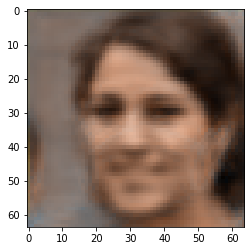

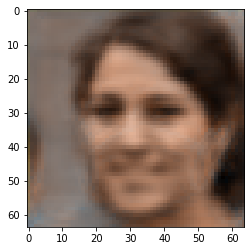

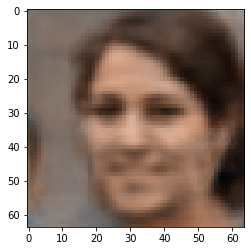

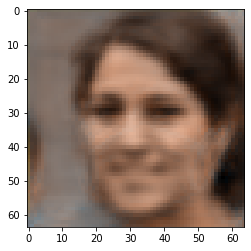

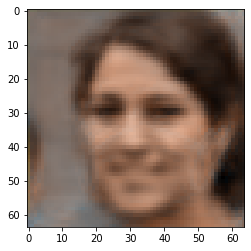

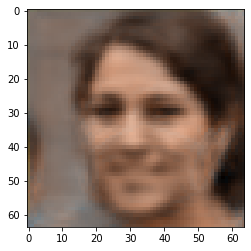

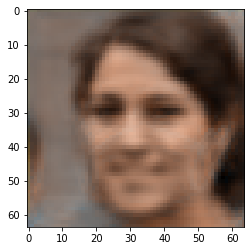

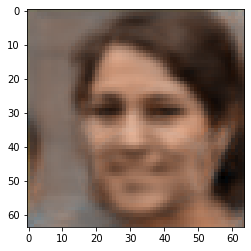

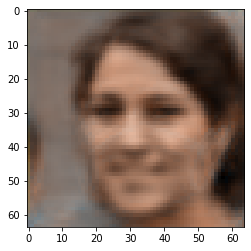

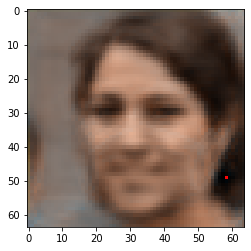

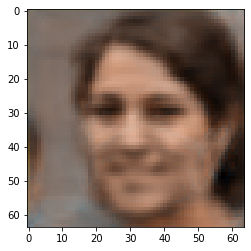

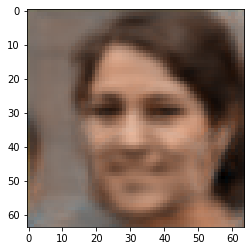

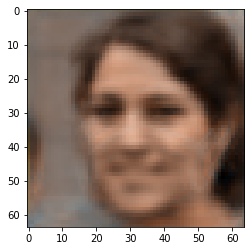

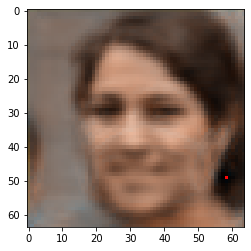

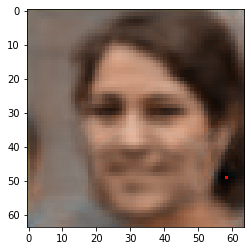

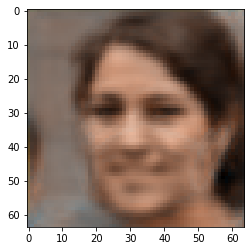

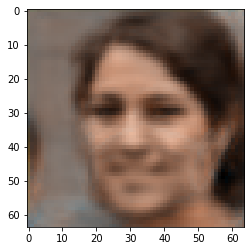

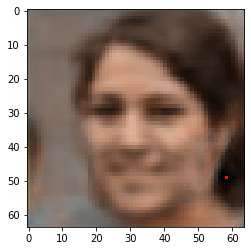

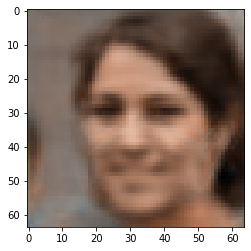

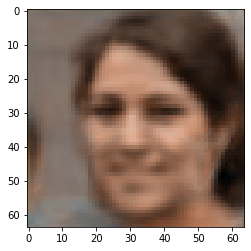

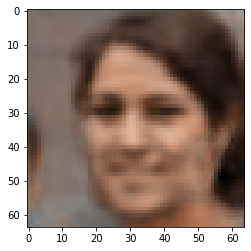

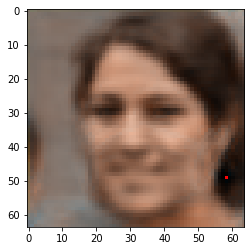

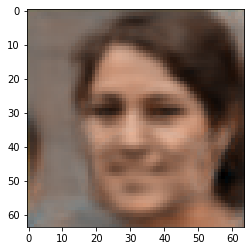

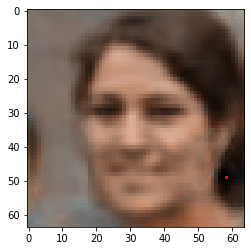

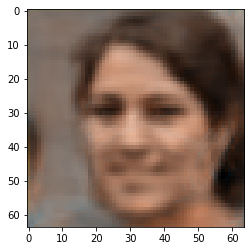

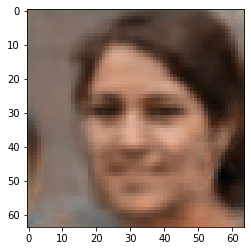

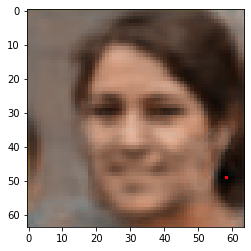

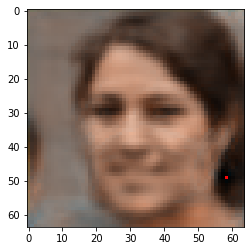

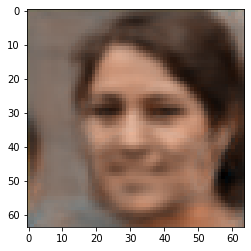

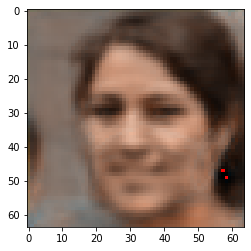

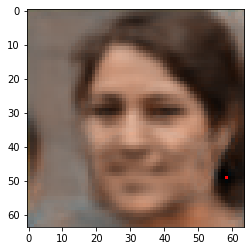

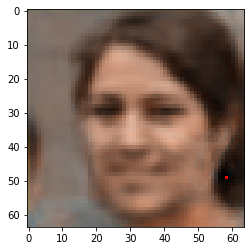

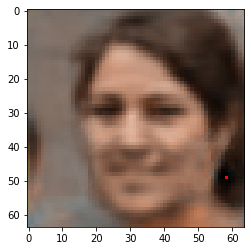

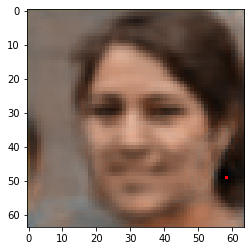

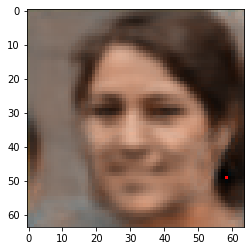

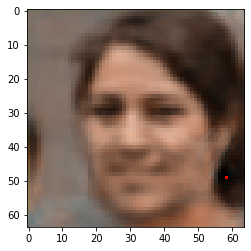

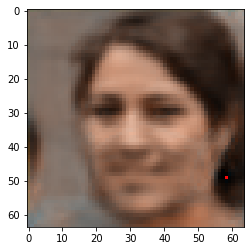

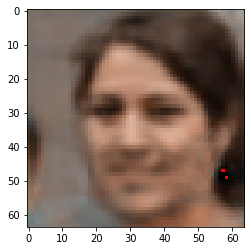

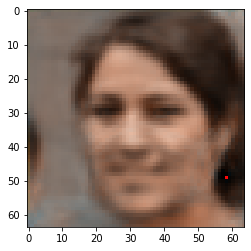

In [33]:
image_nb=1
fig = plt.gcf()
fig.show()
fig.canvas.draw()
for i in range(len(image_log)):
    plt.imshow(image_log[i][image_nb])
    plt.pause(0.05)
    fig.canvas.draw()